In [114]:
%pylab inline
import numpy as np
import numpy.random as rand
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import random as rng
import seaborn as sns
import pickle
import argparse
import pandas as pd 

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda/miniconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axis', 'rand']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## RNN analysis

In [85]:
methods = ['backprop', 'nodepert', 'feedbackalignment', 'weightsym']
#methods = ['backprop', 'feedbackalignment', 'weightsym']
learning_rate = 5e-6
lmbda = 5e-5
var_xi = 0.5

losses = {}
alignments = {}
n_in_epoch = {}
params = {}

#Load the results
for method in methods:
    fn_in = './experiments/rnn_np/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
    p_in = open(fn_in,"rb")
    losses[method] = np.array(pickle.load(p_in))
    alignments[method] = np.array(pickle.load(p_in))
    n_in_epoch[method] = pickle.load(p_in)
    params[method] = pickle.load(p_in)

In [105]:
    method = 'nodepert'
    fn_in = './experiments/rnn_np/%s_learning_rate_%f_lmbda_%f_varxi_%f_N_10.npz'%(method, learning_rate, lmbda, var_xi)
    p_in = open(fn_in,"rb")
    losses[method] = np.array(pickle.load(p_in))

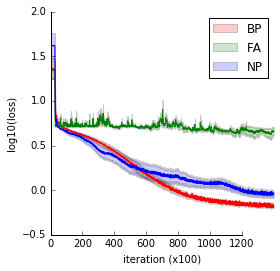

In [106]:
#Make plot of loss for each method
fig = plt.figure(figsize = (4,4))

sns.tsplot(np.log10(losses['backprop']), color='red')
sns.tsplot(np.log10(losses['feedbackalignment']), color = 'green')
#sns.tsplot(np.log10(losses['weightsym']), color = 'gray')
sns.tsplot(np.log10(losses['nodepert']))
plt.legend(['BP', 'FA', 'NP'])
plt.xlabel('iteration (x100)')
plt.ylabel('log10(loss)')
sns.despine(trim = True)
plt.savefig('./figures/cosyne_plots_fig1ci.pdf')

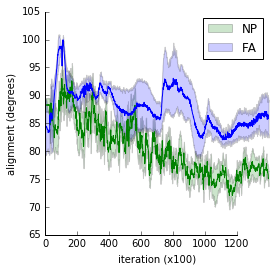

In [103]:
fig = plt.figure(figsize = (4,4))

layer = 1

to_deg = lambda x: 180/np.pi*np.arccos(x)

sns.tsplot(to_deg(alignments['feedbackalignment'][:,:,layer]), color = 'green')
sns.tsplot(to_deg(alignments['nodepert'][:,:,layer]))
plt.legend(['NP', 'FA'])
plt.xlabel('iteration (x100)')
plt.ylabel('alignment (degrees)')
sns.despine(trim = True)
plt.savefig('./figures/cosyne_plots_fig1cii.pdf')

## Feedforward analysis

In [141]:
#Load data from csv files

#Load BP loss and acc
bp_acc = np.array(pd.read_csv('./cosyne_analysis/bp_run_summary_train-tag-acc_1.csv'))
bp_loss = np.array(pd.read_csv('./cosyne_analysis/bp_run_summary_train-tag-loss_2.csv'))

#Load FA loss, acc, and alignment of two layers
fa_acc = np.array(pd.read_csv('./cosyne_analysis/fa_run_summary_train-tag-acc_1.csv'))
fa_loss = np.array(pd.read_csv('./cosyne_analysis/fa_run_summary_train-tag-loss_2.csv'))
fa_align1 = np.array(pd.read_csv('./cosyne_analysis/fa_run_summary_train-tag-align_B1_1.csv'))
fa_align2 = np.array(pd.read_csv('./cosyne_analysis/fa_run_summary_train-tag-align_B2_1.csv'))

#Load NP loss, acc, and alignment of two layers
np_acc = np.array(pd.read_csv('./cosyne_analysis/np_run_summary_train-tag-acc_1.csv'))
#np_loss = np.array(pd.read_csv('./cosyne_analysis/np_run_summary_train-tag-loss_2.csv'))
np_align1 = np.array(pd.read_csv('./cosyne_analysis/np_run_summary_train-tag-align_B3_1.csv'))
#np_align2 = np.array(pd.read_csv('./cosyne_analysis/np_run_summary_train-tag-align_B1_1.csv'))


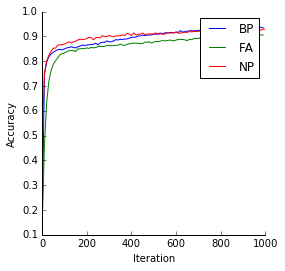

In [142]:
#Error plots
plt.figure(figsize = (4,4))
n = fa_acc.shape[0]
plt.plot(range(0,n,10), bp_acc[::10,2])
plt.plot(range(0,n,10), fa_acc[::10,2])
plt.plot(10*np.arange(101), np_acc[335:,2])
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
sns.despine(trim=True)
plt.legend(['BP', 'FA', 'NP'])
plt.savefig('./figures/cosyne_plots_fig1bi.pdf')

In [122]:
#Loss plots
np_acc.shape

(436, 3)

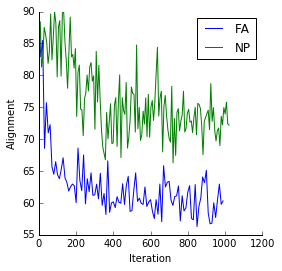

In [151]:
#Alignment plots
#Error plots
plt.figure(figsize = (4,4))
n = fa_acc.shape[0]
plt.plot(range(0,n,10), fa_align1[::10,2])
plt.plot(7*np.arange(147), np_align1[:,2])
plt.xlabel('Iteration')
plt.ylabel('Alignment')
sns.despine(trim=True)
plt.legend(['FA', 'NP'])
plt.savefig('./figures/cosyne_plots_fig1bii.pdf')

In [145]:
np_align1.shape

(147, 3)